In [1]:
!nvidia-smi

Fri Apr  5 18:03:11 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   41C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [2]:
!pip install ultralytics==8.0.196

In [3]:
from ultralytics import YOLO
import os
from IPython.display import display, Image
from IPython import display

display.clear_output()
!yolo checks

Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 29.1/78.2 GB disk)

OS                  Linux-6.1.58+-x86_64-with-glibc2.35
Environment         Colab
Python              3.10.12
Install             pip
RAM                 12.67 GB
CPU                 Intel Xeon 2.30GHz
CUDA                12.1

matplotlib          ✅ 3.7.1>=3.3.0
numpy               ✅ 1.25.2>=1.22.2
opencv-python       ✅ 4.8.0.76>=4.6.0
pillow              ✅ 9.4.0>=7.1.2
pyyaml              ✅ 6.0.1>=5.3.1
requests            ✅ 2.31.0>=2.23.0
scipy               ✅ 1.11.4>=1.4.1
torch               ✅ 2.2.1+cu121>=1.8.0
torchvision         ✅ 0.17.1+cu121>=0.9.0
tqdm                ✅ 4.66.2>=4.64.0
pandas              ✅ 2.0.3>=1.1.4
seaborn             ✅ 0.13.1>=0.11.0
psutil              ✅ 5.9.5
py-cpuinfo          ✅ 9.0.0
thop                ✅ 0.1.1-2209072238>=0.1.1


In [4]:
!pip install roboflow

In [5]:
from roboflow import Roboflow
rf = Roboflow(api_key="kJsZ7pUWoS4c5t00BIBF")
project = rf.workspace("mrtiitb").project("tigers-evfmb")
version = project.version(1)
dataset = version.download("yolov8")

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Tigers-1 in yolov8:: 100%|██████████| 62/62 [00:00<00:00, 5722.11it/s]


In [6]:
!yolo task=detect mode=train model=yolov8m.pt data={dataset.location}/data.yaml epochs=20 imgsz=640

100% 49.7M/49.7M [00:00<00:00, 121MB/s]
New https://pypi.org/project/ultralytics/8.1.43 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8m.pt, data=/content/Tigers-1/data.yaml, epochs=20, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_buffer=False, line_width=

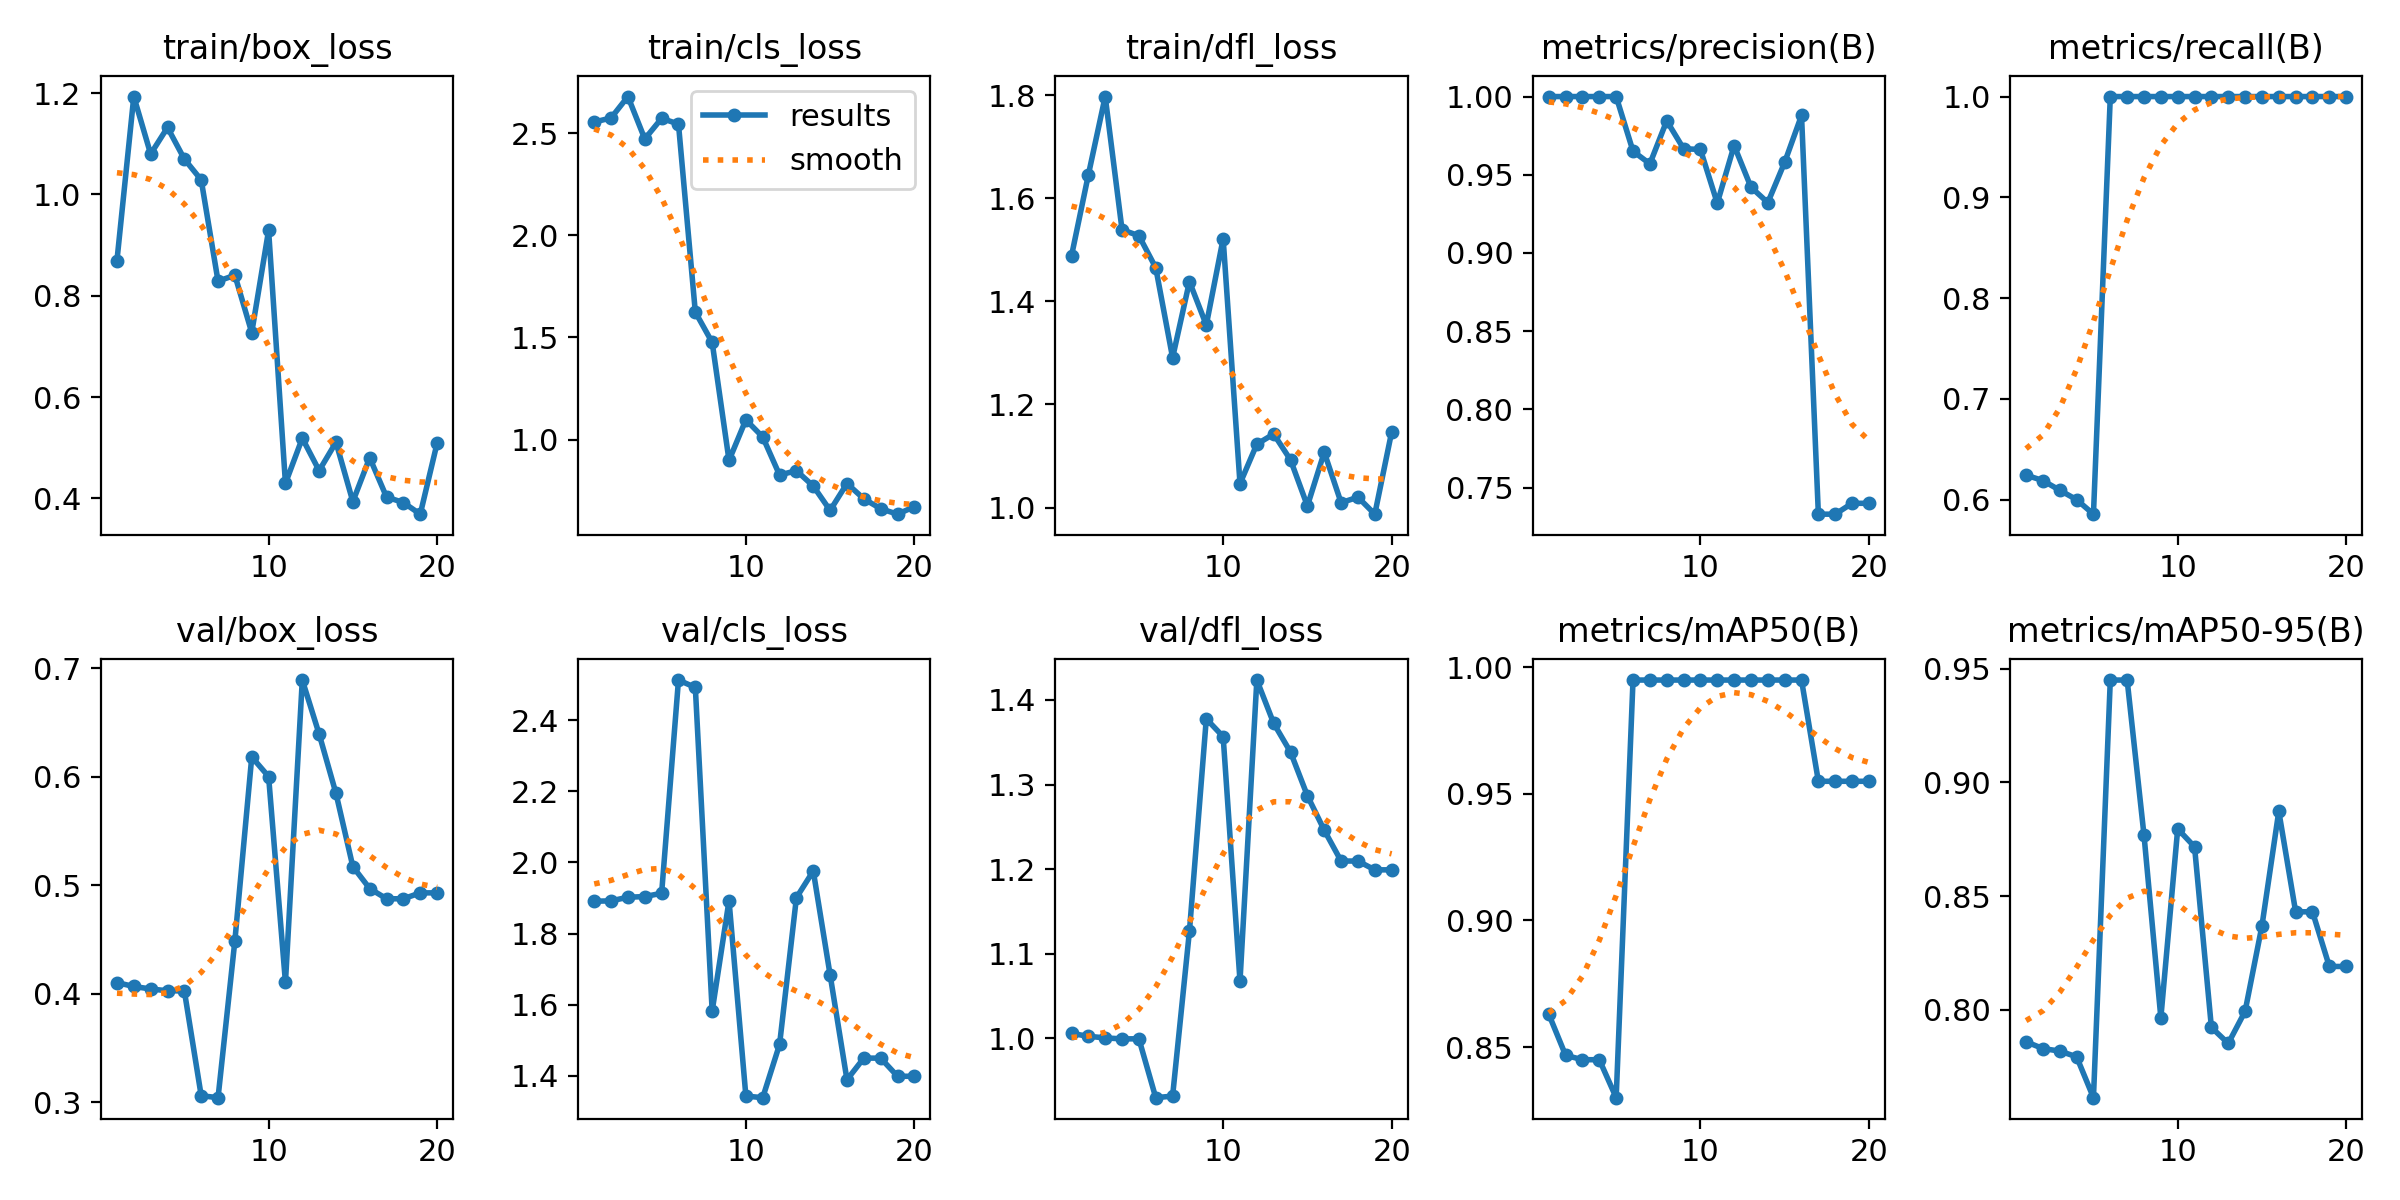

In [7]:
Image(filename=f'/content/runs/detect/train/results.png', width=600)

In [8]:
!yolo task=detect mode=val model=/content/runs/detect/train/weights/best.pt conf=0.5 data={dataset.location}/data.yaml

Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs
val: Scanning /content/Tigers-1/valid/labels.cache... 5 images, 0 backgrounds, 0 corrupt: 100% 5/5 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 1/1 [00:00<00:00,  1.32it/s]
                   all          5          6      0.957          1      0.995      0.955
Speed: 0.3ms preprocess, 37.3ms inference, 0.0ms loss, 94.5ms postprocess per image
Results saved to runs/detect/val
💡 Learn more at https://docs.ultralytics.com/modes/val


In [9]:
!yolo task=detect mode=predict model=/content/runs/detect/train/weights/best.pt source=/content/Tigers-1/test/images

Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs

image 1/5 /content/Tigers-1/test/images/2020-11-02-17-59-03_Tiger-scent-marking-s-laycock-banner_jpeg.rf.44b4f044d3eb8b857379bec0cbaf523f.jpg: 640x640 3 tigers, 37.1ms
image 2/5 /content/Tigers-1/test/images/Walking_tiger_female_jpg.rf.6bf8b3599a24e023bed415d626c05a85.jpg: 640x640 1 tiger, 37.2ms
image 3/5 /content/Tigers-1/test/images/a-g-yuqgnyku1m8-unsplash-medium-1702547390_jpeg.rf.384c90d58476201a0b9d2d248068b557.jpg: 640x640 1 tiger, 37.0ms
image 4/5 /content/Tigers-1/test/images/pexels-diego-f-parra-16878223_jpg.rf.216d82a117a7108e16fc8aa2944cd618.jpg: 640x640 3 tigers, 37.0ms
image 5/5 /content/Tigers-1/test/images/pexels-photo-533055_jpeg.rf.7cbdda6b70cee75e375f3253c29f1e31.jpg: 640x640 1 tiger, 37.0ms
Speed: 1.8ms preprocess, 37.1ms inference, 117.8ms postprocess per image at shape (1, 3, 640, 640)
Results sa

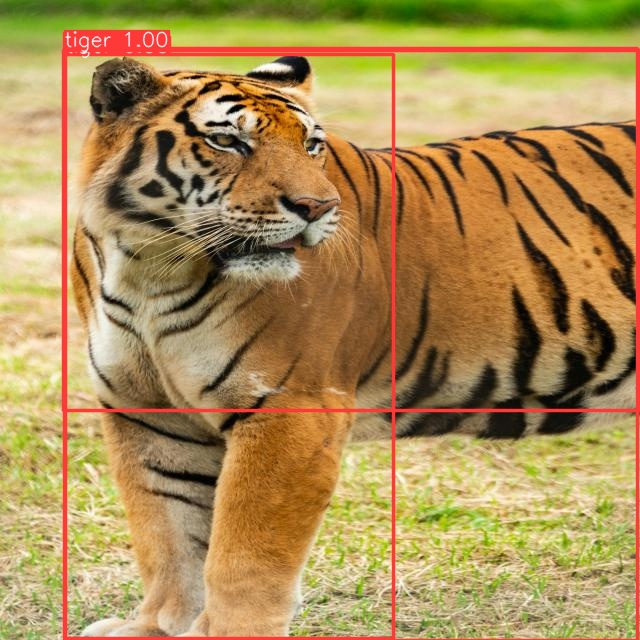

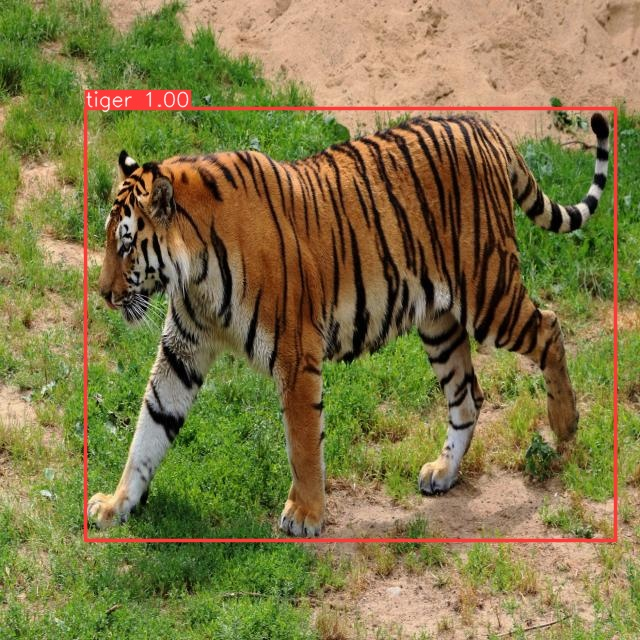

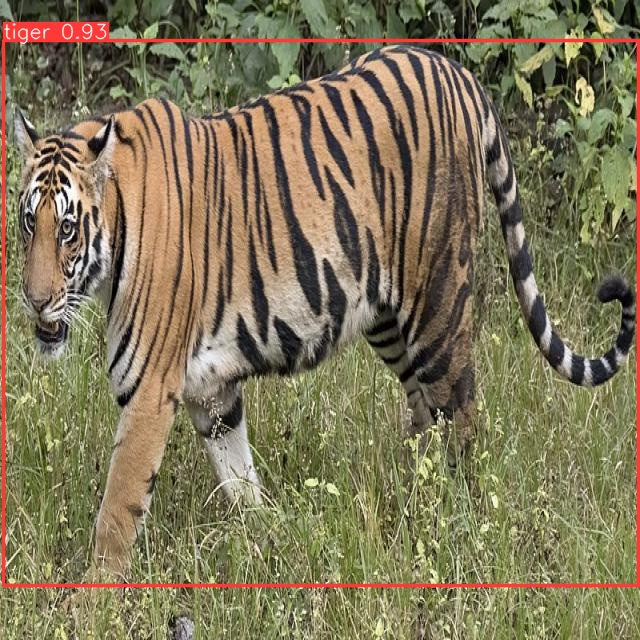

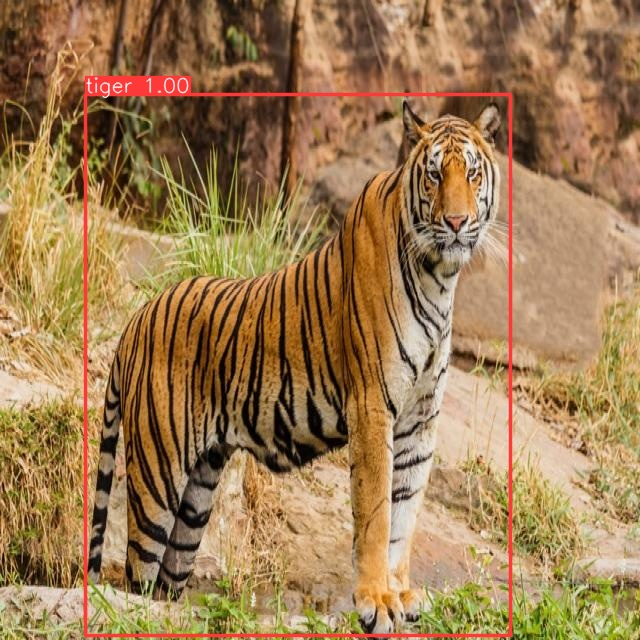

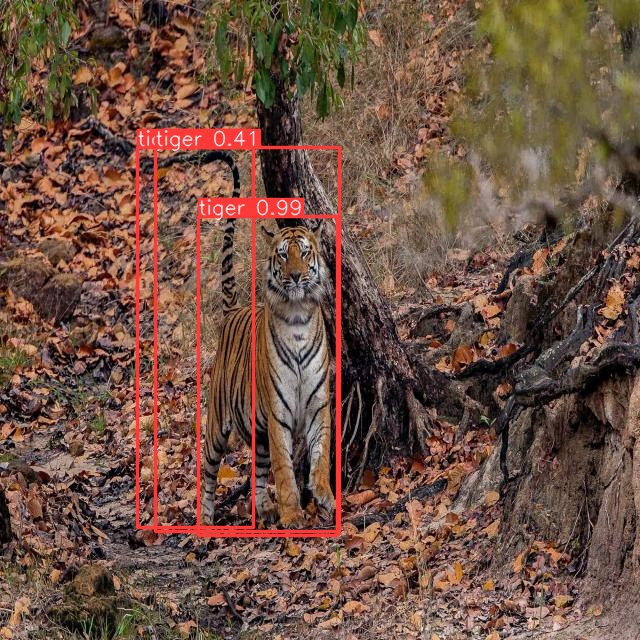

In [10]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'/content/runs/detect/predict/*.jpg'):
    display(Image(filename=image_path, height=600))
    print("\n")

In [11]:
# !rm -r runs
# !rm -r Tigers-1
# !rm yolov8m.pt
# !rm yolov8n.pt